In [226]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

In [155]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/index_data.csv')
print(data)

In [ ]:
data.dtypes

**Data Preprocessing**

In [157]:
data['variable'] = pd.to_datetime(data['variable'], format='%d/%m/%Y')
data.set_index('variable', inplace=True)
data.sort_index(inplace=True)

# **Data Correlation**

In [ ]:
# Calculate the correlation between cci and other variables
corr_cci = data.corr()['cci']

# Print the correlation values
print(corr_cci)

In [ ]:
# Calculate the correlation between cmi and other variables
corr_cmi = data.corr()['cmi']

# Print the correlation values
print(corr_cmi)

In [ ]:
# Calculate the correlation between cpi and other variables
corr_cpi = data.corr()['cpi']

# Print the correlation values
print(corr_cpi)

In [ ]:
# Calculate the correlation between exi and other variables
corr_exi = data.corr()['exi']

# Print the correlation values
print(corr_exi)

In [ ]:
# Calculate the correlation between imi and other variables
corr_imi = data.corr()['imi']

# Print the correlation values
print(corr_imi)

In [ ]:
# Calculate the correlation between ppi and other variables
corr_ppi = data.corr()['ppi']

# Print the correlation values
print(corr_ppi)

# **Data Splitting**

In [159]:
date = '2020-12-31'  
train = data.loc[data.index <= date]
test = data.loc[data.index > date]

In [ ]:
train.head(5)

In [ ]:
test.head(5)

# **ARIMA model** 

In [165]:
def arima(train_y,order,train_x,test_x):
  model = ARIMA(train_y, order=order, exog=train_x)
  fitmodel= model.fit()
  forecast = fitmodel.forecast(steps=len(test), exog=test_x)  
  #if the value is negative convert to 0
  forecast = list(forecast)
  forecast = [max(0, x) for x in forecast]
  return forecast

ARIMA model evaluation

In [167]:
from sklearn.metrics import r2_score 
import math
def evaluation_arima(y_pred,y_test):
  y_pred = list(forecast)
  y_test = list(test_y)
  print("\nARIMA evaluation Score:")
  print(f"r squared: {r2_score(y_test, y_pred)}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

# cci

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


cci:
Forecasted= 44.23419478324814 / Actual= 43.2
Forecasted= 43.088478812532294 / Actual= 45.48653178
Forecasted= 45.439148272095466 / Actual= 47.5
Forecasted= 47.28203411661365 / Actual= 43.5
Forecasted= 42.914249714349474 / Actual= 41.59951203
Forecasted= 41.861571252208705 / Actual= 42.66250473
Forecasted= 40.22852643982624 / Actual= 36.7
Forecasted= 39.9248795623383 / Actual= 37.21849153
Forecasted= 42.411363325939895 / Actual= 42.11810898
Forecasted= 43.327824077348865 / Actual= 43.4
Forecasted= 43.672916582395715 / Actual= 45.23959366
Forecasted= 43.94379918809299 / Actual= 46.95031864
Forecasted= 44.91159436155233 / Actual= 44.62303796
Forecasted= 44.744293133544005 / Actual= 44.62303796
Forecasted= 43.82668621404637 / Actual= 43.81142669
Forecasted= 46.12028536191485 / Actual= 45.74882856
Forecasted= 47.69964812146593 / Actual= 44.65547494


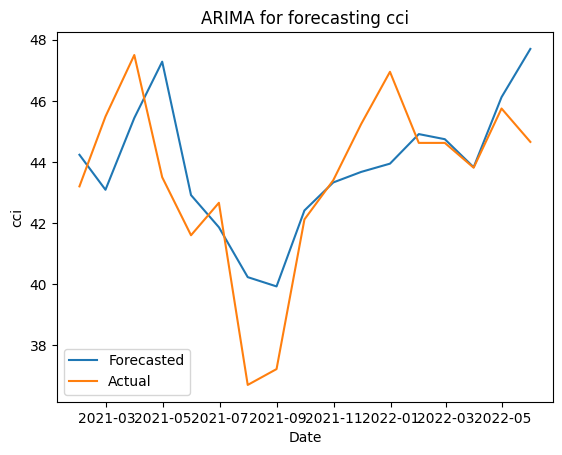


ARIMA evaluation Score:
r squared: 0.49517350388988357
RMSE: 2.0088654708224176


In [263]:
# selected_columns = ['mwage', 'exi', 'gcci', 'cor'] 
selected_columns = ['mwage', 'gcci', 'cpi', 'imi']
train_x = train[selected_columns]
train_y = train['cci']
test_x = test[selected_columns]
test_y = test['cci']

order = (2, 0, 1) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("cci:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('cci')
plt.title('ARIMA for forecasting cci')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

# cmi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


cmi:
Forecasted= 108.66319794202812 / Actual= 109.3
Forecasted= 109.27126212774427 / Actual= 109.7
Forecasted= 110.53975362989833 / Actual= 110.2
Forecasted= 111.45116520674974 / Actual= 112.3
Forecasted= 112.9905310620669 / Actual= 114.6
Forecasted= 113.8015182486611 / Actual= 114.6
Forecasted= 113.89554237038573 / Actual= 112.9
Forecasted= 112.9818951575999 / Actual= 113.6
Forecasted= 112.14621190531267 / Actual= 113.6
Forecasted= 113.79734965442746 / Actual= 115.4
Forecasted= 114.02181460734955 / Actual= 116.0
Forecasted= 114.24830119403731 / Actual= 115.2
Forecasted= 116.57263207957274 / Actual= 116.0
Forecasted= 117.95860162129615 / Actual= 117.1
Forecasted= 121.62547116813393 / Actual= 119.7
Forecasted= 123.09228093540162 / Actual= 122.2
Forecasted= 122.7740492359204 / Actual= 122.1


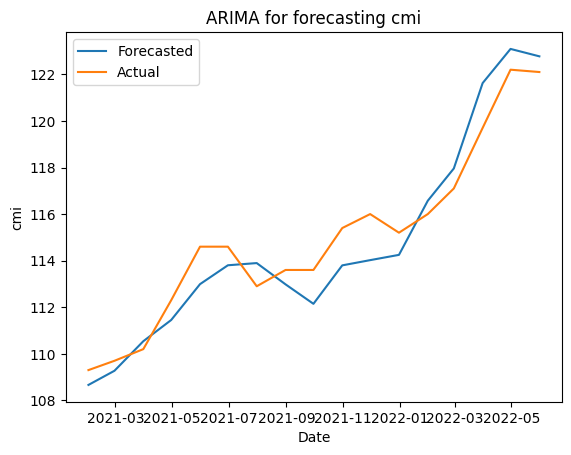


ARIMA evaluation Score:
r squared: 0.906503970763482
RMSE: 1.1259086463230057


In [178]:
selected_columns = ['ppi', 'pstl', 'wage']
train_x = train[selected_columns]
train_y = train['cmi']
test_x = test[selected_columns]
test_y = test['cmi']

order = (0, 0, 0) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("cmi:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('cmi')
plt.title('ARIMA for forecasting cmi')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

# cpi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


cpi:
Forecasted= 99.95442699661496 / Actual= 99.79
Forecasted= 100.26392673979193 / Actual= 98.88
Forecasted= 100.55186881522057 / Actual= 99.11
Forecasted= 100.69521285795581 / Actual= 100.48
Forecasted= 100.82364703782233 / Actual= 99.55
Forecasted= 101.1155064798567 / Actual= 99.93
Forecasted= 101.21472903238985 / Actual= 99.81
Forecasted= 100.9725702605657 / Actual= 99.63
Forecasted= 101.33907676384653 / Actual= 101.21
Forecasted= 101.78668624568284 / Actual= 101.96
Forecasted= 101.8629566239347 / Actual= 102.25
Forecasted= 101.4670972727056 / Actual= 101.86
Forecasted= 102.24590866378404 / Actual= 103.01
Forecasted= 103.93475438407506 / Actual= 104.1
Forecasted= 105.30520912862657 / Actual= 104.79
Forecasted= 104.8535352152497 / Actual= 105.15
Forecasted= 105.30300855021133 / Actual= 106.62


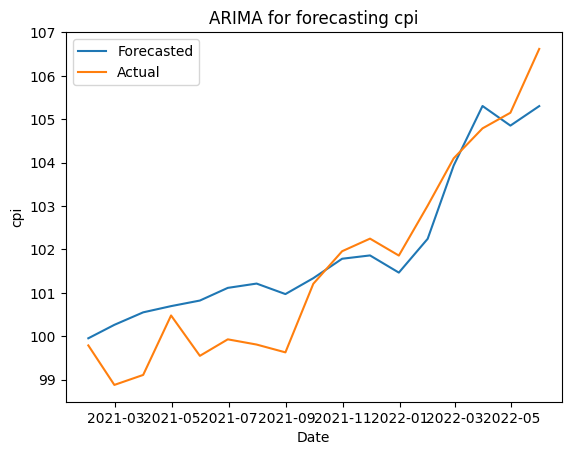


ARIMA evaluation Score:
r squared: 0.8438385504482268
RMSE: 0.9049135882164989


In [238]:
selected_columns = ['imi', 'exi', 'cor', 'poil', 'pfod', 'mwage']
train_x = train[selected_columns]
train_y = train['cpi']
test_x = test[selected_columns]
test_y = test['cpi']

order = (2, 0, 0) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("cpi:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('cpi')
plt.title('ARIMA for forecasting cpi')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

# exi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


exi:
Forecasted= 101.70158282338173 / Actual= 101.9
Forecasted= 102.11302374616841 / Actual= 102.5
Forecasted= 102.58473589841105 / Actual= 103.0
Forecasted= 102.78612766291464 / Actual= 102.8
Forecasted= 103.25987813198259 / Actual= 103.2
Forecasted= 103.40019519788959 / Actual= 103.4
Forecasted= 103.43583448452435 / Actual= 103.5
Forecasted= 103.554077872171 / Actual= 103.4
Forecasted= 103.7681333331017 / Actual= 103.7
Forecasted= 104.59410493651077 / Actual= 104.6
Forecasted= 104.92940888777737 / Actual= 104.8
Forecasted= 104.5070851173904 / Actual= 104.7
Forecasted= 105.26109210003796 / Actual= 105.5
Forecasted= 106.00033565343364 / Actual= 106.4
Forecasted= 108.07329236398898 / Actual= 107.6
Forecasted= 108.13901252014696 / Actual= 108.0
Forecasted= 108.50220020250123 / Actual= 108.4


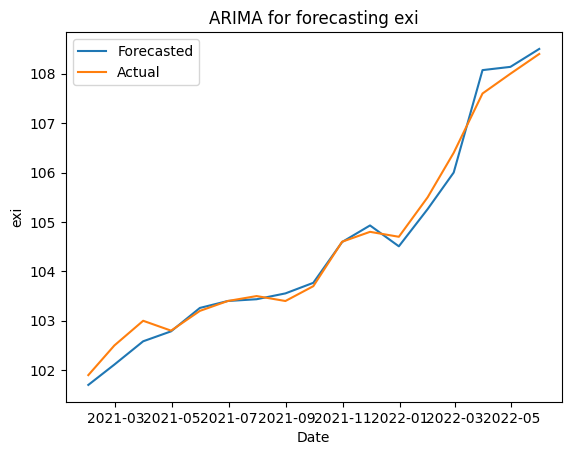


ARIMA evaluation Score:
r squared: 0.9854558745228392
RMSE: 0.2329380956938671


In [216]:
selected_columns = ['pfod', 'poil', 'netex', 'ppi', 'wage', 'mwage']
train_x = train[selected_columns]
train_y = train['exi']
test_x = test[selected_columns]
test_y = test['exi']

order = (0, 1, 0) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("exi:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('exi')
plt.title('ARIMA for forecasting exi')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

# imi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


imi:
Forecasted= 95.84632365507116 / Actual= 95.8
Forecasted= 97.22508668903004 / Actual= 97.5
Forecasted= 98.32012825059762 / Actual= 98.7
Forecasted= 98.83222386608178 / Actual= 98.3
Forecasted= 100.11344591260982 / Actual= 99.6
Forecasted= 101.05831082426621 / Actual= 101.0
Forecasted= 101.68001040861469 / Actual= 101.5
Forecasted= 101.88604445862148 / Actual= 100.8
Forecasted= 102.82510053463861 / Actual= 102.2
Forecasted= 104.72473187339986 / Actual= 104.6
Forecasted= 105.31664900603178 / Actual= 104.9
Forecasted= 104.6010641160234 / Actual= 104.3
Forecasted= 106.57787440088813 / Actual= 106.6
Forecasted= 108.4396627400739 / Actual= 109.3
Forecasted= 112.42552713949587 / Actual= 113.0
Forecasted= 111.83075142726778 / Actual= 112.4
Forecasted= 112.92992045948189 / Actual= 113.9


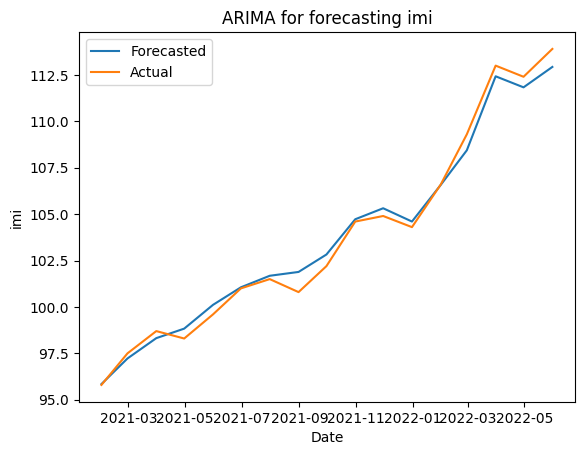


ARIMA evaluation Score:
r squared: 0.9900799747776319
RMSE: 0.5418130211251591


In [225]:
selected_columns = ['pfod', 'poil', 'imp', 'ppi', 'wage', 'mwage']
train_x = train[selected_columns]
train_y = train['imi']
test_x = test[selected_columns]
test_y = test['imi']

order = (0, 2, 2) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("imi:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('imi')
plt.title('ARIMA for forecasting imi')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

# ppi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ppi:
Forecasted= 98.94136656255597 / Actual= 98.8
Forecasted= 99.8171010273816 / Actual= 99.3
Forecasted= 100.62507120756459 / Actual= 100.5
Forecasted= 100.73132827829289 / Actual= 101.1
Forecasted= 101.43221167234546 / Actual= 101.6
Forecasted= 102.10901834771443 / Actual= 102.1
Forecasted= 102.59003224027748 / Actual= 102.2
Forecasted= 102.72053618283185 / Actual= 102.7
Forecasted= 103.34400119602408 / Actual= 103.0
Forecasted= 104.7337561220405 / Actual= 104.8
Forecasted= 105.21847937597359 / Actual= 106.1
Forecasted= 105.1215794325541 / Actual= 105.7
Forecasted= 106.52730412990516 / Actual= 107.4
Forecasted= 107.79558289999807 / Actual= 108.6
Forecasted= 109.70212131093663 / Actual= 112.0
Forecasted= 110.09050856924483 / Actual= 114.0
Forecasted= 110.9437063447497 / Actual= 115.1


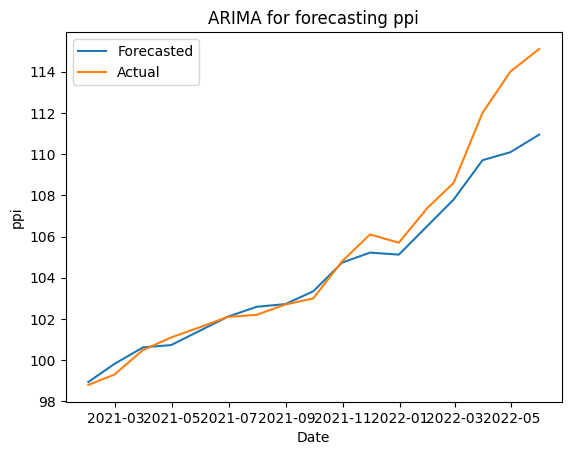


ARIMA evaluation Score:
r squared: 0.8961967713526089
RMSE: 1.5549149100082427


In [278]:
selected_columns = ['imi', 'exi','poil', 'pfod', 'wage']
train_x = train[selected_columns]
train_y = train['ppi']
test_x = test[selected_columns]
test_y = test['ppi']

order = (1, 2, 2) 
# ARIMA model
forecast = arima(train_y,order,train_x,test_x)
print("ppi:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test_y.iloc[i]}")

plt.xlabel('Date')
plt.ylabel('ppi')
plt.title('ARIMA for forecasting ppi')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test_y, label='Actual')
plt.legend()
plt.show()

evaluation_arima(forecast,test_y)

#  Find the best suited order for ARIMA model

In [270]:
def find_order(train_y,train_x,test_x,test_y):
# Define the range of each value
  p_values = range(3)  
  d_values = range(3)  
  q_values = range(3)  
  lowest_RMSE = np.inf
  best_order = None
  for p in p_values:
      for d in d_values:
          for q in q_values:
              order = (p, d, q)
              forecast = arima(train_y,order,train_x,test_x)
              RMSE = np.sqrt(mean_squared_error(test_y, forecast))
              # print(f"Order= {order}/ RMSE = {RMSE}")
              if RMSE < lowest_RMSE:
                  lowest_RMSE = RMSE
                  best_order = order
  print(f"Best suited order = {best_order}/ lowest RMSE = {lowest_RMSE}")

suited order for cci

In [271]:
selected_columns = ['mwage', 'gcci', 'cpi', 'imi']
train_x = train[selected_columns]
train_y = train['cci']
test_x = test[selected_columns]
test_y = test['cci']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Best suited order = (2, 0, 1)/ lowest RMSE = 2.0088654708224176


suited order for cmi

In [272]:
selected_columns = ['ppi', 'pstl', 'wage']
train_x = train[selected_columns]
train_y = train['cmi']
test_x = test[selected_columns]
test_y = test['cmi']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Best suited order = (0, 0, 0)/ lowest RMSE = 1.1259086463230057


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


suited order for cpi

In [273]:
selected_columns = ['imi', 'exi', 'cor', 'poil', 'pfod', 'mwage']
train_x = train[selected_columns]
train_y = train['cpi']
test_x = test[selected_columns]
test_y = test['cpi']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Best suited order = (0, 2, 1)/ lowest RMSE = 0.8417934328592422


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


suited order for exi

In [274]:
selected_columns = ['pfod', 'poil', 'netex', 'ppi', 'wage', 'mwage']
train_x = train[selected_columns]
train_y = train['exi']
test_x = test[selected_columns]
test_y = test['exi']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Best suited order = (0, 1, 0)/ lowest RMSE = 0.2329380956938671


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


suited order for imi

In [275]:
selected_columns = ['pfod', 'poil', 'imp', 'ppi', 'wage', 'mwage']
train_x = train[selected_columns]
train_y = train['imi']
test_x = test[selected_columns]
test_y = test['imi']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Best suited order = (0, 2, 2)/ lowest RMSE = 0.5418130211251591


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

suited order for ppi

In [276]:
selected_columns = ['imi', 'exi','poil', 'pfod', 'wage']
train_x = train[selected_columns]
train_y = train['ppi']
test_x = test[selected_columns]
test_y = test['ppi']

find_order(train_y,train_x,test_x,test_y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Best suited order = (1, 2, 2)/ lowest RMSE = 1.5549149100082427


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


# **XGBoost model for forecasting**

**XGBoost model Evaluation**

In [ ]:
from sklearn.metrics import r2_score 
def evaluation(y_pred,y_test):
  y_pred = list(forecast)
  y_test = list(test_y)
  print("\nXgboost evaluation Score:")
  print(f"r squared: {r2_score(y_test, y_pred)}\n RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    

**XGBoost model for forecasting cci**

In [ ]:
import xgboost as xgb 
# Select specific columns 
selected_columns = ['mwage', 'exi', 'gcci']  
# selected_columns = ['mwage', 'wage', 'unem']  
train_x = train[selected_columns]
train_y = train['cci']
test_x = test[selected_columns]
test_y = test['cci']

# Create the XGBoost model
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                               n_estimators=100,
                               max_depth=3,
                               learning_rate=0.05)

# Fit the model to the training data
fitmodel= model.fit(train_x, train_y)

# Forecast the values
forecast = fitmodel.predict(test_x)

#if the value is negative convert to 0
forecast = list(forecast)
forecast = [max(0, x) for x in forecast]

# Print the forecasted and actual values
print("cci:")
for i in range(len(test)):
    print(f"Forecasted= {forecast[i]} / Actual= {test['cci'].iloc[i]}")

#graph
plt.xlabel('Date')
plt.ylabel('cci')
plt.title('XGBoost for forecasting cci')
plt.plot(test.index, forecast, label='Forecasted')
plt.plot(test.index, test['cci'], label='Actual')
plt.legend()
plt.show()

evaluation(forecast,test_y)